In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [2]:
assessments = pd.read_csv('/home/alla/Downloads/cor/assessments.csv')
courses = pd.read_csv('/home/alla/Downloads/cor/courses.csv')
studentAssessment = pd.read_csv('/home/alla/Downloads/cor/studentAssessment.csv')
studentRegistration = pd.read_csv('/home/alla/Downloads/cor/studentRegistration.csv')

In [ ]:
###################################################################################################################

In [ ]:
# Задание 1
# Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене).
# Принимаем, что курс == предмет

In [3]:
# Объединяем две таблицы studentAssessment и assessments.

assessments_merged = studentAssessment.merge(assessments, on='id_assessment')

In [4]:
# Считаем сколько экзаменов запланировано в рамках каждого курса.

assessments \
    .query('assessment_type=="Exam"') \
    .groupby(['code_module', 'code_presentation'], as_index=False) \
    .agg({'id_assessment': 'nunique'}) \
    .rename(columns={'id_assessment': 'assessments'}) \
    .pivot(index='code_module', columns='code_presentation', values='assessments')

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
AAA,NaN,1.0,NaN,1.0
BBB,1.0,1.0,1.0,1.0
CCC,NaN,NaN,2.0,2.0
DDD,1.0,1.0,1.0,1.0
EEE,NaN,1.0,1.0,1.0
FFF,1.0,1.0,1.0,1.0
GGG,NaN,1.0,1.0,1.0


In [5]:
# Считаем сколько по факту экзаменов было сдано студентами.

assessments_merged \
    .query('assessment_type=="Exam"') \
    .groupby(['code_module','code_presentation'], as_index=False) \
    .agg({ 'assessment_type':'nunique'}) \
    .rename(columns={'assessment_type':'assessments'}) \
    .pivot(index='code_module', columns='code_presentation', values='assessments')

code_presentation,2013B,2013J,2014B,2014J
code_module,,,,
CCC,NaN,NaN,1.0,1.0
DDD,1.0,1.0,1.0,1.0


In [6]:
# Информация о сдаче студентами ЭКЗАМЕНОВ есть только для следующих курсов:

assessments_merged \
    .query('assessment_type == "Exam"') \
    .code_module.unique()

# CCC, DDD.

# Почему из 7 курсов, которые проходили студенты, в таблице с результатами тестов студентов есть информация о сдаче ЭКЗАМЕНОВ только по двум курсам?

# Первая версия: курсы еще не закончились и итоговые экзамены студенты еще не сдавали. Однако это не объясняет полное отсутствие
# результатов экзамена по этим курсам в предыдущих семестрах.

# Вторая версия: с условием того, что если учащийся не отправляет работу на оценку, результат не записывается в таблицу,
# по многим курсам студенты просто не доходили до сдачи экзамена. Посмотреть на то, сколько студентов отсеивается на каждом этапе сдачи каждого теста по курсу.
# Смотрим, сколько студентов отсеивается на каждом из тестов в курсе на примере курса BBB и семестра 2014B.

array(['CCC', 'DDD'], dtype=object)

In [7]:
# Сколько и какие тесты нужно сдать по курсу BBB в семестре 2014B.

assessments.query('code_module == "BBB" and code_presentation == "2014B"')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
36,BBB,2014B,15015,CMA,47.0,1.0
37,BBB,2014B,15016,CMA,82.0,1.0
38,BBB,2014B,15017,CMA,117.0,1.0
39,BBB,2014B,15018,CMA,152.0,1.0
40,BBB,2014B,15019,CMA,194.0,1.0
41,BBB,2014B,15008,TMA,12.0,5.0
42,BBB,2014B,15009,TMA,40.0,18.0
43,BBB,2014B,15010,TMA,82.0,18.0
44,BBB,2014B,15011,TMA,117.0,18.0
45,BBB,2014B,15012,TMA,152.0,18.0


In [91]:
# Сколько студентов сдало каждый тест в курсе BBB в семестре 2014B успешно.

viz1_1 = assessments_merged.query('code_module == "BBB" and code_presentation == "2014B" and score >= 40') \
    .groupby(['id_assessment', 'assessment_type'], as_index=False) \
    .agg({'id_student':'nunique'})
viz1_1

,id_assessment,assessment_type,id_student
0,15008,TMA,1181
1,15009,TMA,1071
2,15010,TMA,906
3,15011,TMA,791
4,15012,TMA,765
5,15013,TMA,646
6,15015,CMA,1051
7,15016,CMA,968
8,15017,CMA,870
9,15018,CMA,806


Text(0.5, 1.0, 'BBB 2014B')

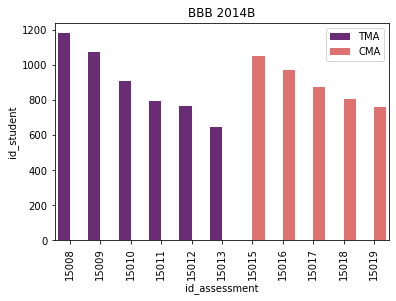

In [92]:
# Визуализируем результат.

sns.barplot(data=viz1_1, x='id_assessment', y='id_student', hue='assessment_type', palette='magma')
plt.legend(loc='upper right')
plt.xticks(rotation=90) 
plt.title("BBB 2014B")

In [ ]:
# Вывод: около половины студентов отсеялось к последним тестам с типами оценивания TMA и CMA, но успешно сдавших все еще много, чтобы 
# пропустить экзамен без какой-либо причины. 

In [10]:
# Третья версия.
# Возможна ли ситуация, когда результирующую оценку за курс преподаватели могли ставить на основании результатов других тестов по курсу, 
# и студенты не проходили экзаменационный тест, соответственно, не отправляли результаты, и поэтому нет записи в таблице studentAssessment?
# Проверить даты экзаменов по курсу.

assessments.isna().sum()

code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

In [11]:
# Курсы, для которых нет информации о дате окончательной сдачи экзамена. 
# Возможно, как раз результирующую оценку по этим курсам могли поставить на основании результатов всех тестов.
# Проверить, есть ли результаты этих id_assessment в таблице studentAssessment/assessments_mergered.

assessments.loc[assessments.date.isna()]

,code_module,code_presentation,id_assessment,assessment_type,date,weight
5,AAA,2013J,1757,Exam,NaN,100.0
11,AAA,2014J,1763,Exam,NaN,100.0
23,BBB,2013B,14990,Exam,NaN,100.0
35,BBB,2013J,15002,Exam,NaN,100.0
47,BBB,2014B,15014,Exam,NaN,100.0
53,BBB,2014J,15025,Exam,NaN,100.0
62,CCC,2014B,24290,Exam,NaN,100.0
63,CCC,2014B,40087,Exam,NaN,100.0
72,CCC,2014J,24299,Exam,NaN,100.0
73,CCC,2014J,40088,Exam,NaN,100.0


In [12]:
assessments.loc[assessments.date.isna()].id_assessment.isin(assessments_merged.id_assessment)

# Видим, что несмотря на отсутствие даты итоговой сдачи экзамена по курсу, для 3х экзаменов есть результаты их прохождения студентами.
# Следовательно, третья версия себя тоже не оправдала.

5      False
11     False
23     False
35     False
47     False
53     False
62      True
63     False
72      True
73     False
108     True
Name: id_assessment, dtype: bool

In [ ]:
# Также важно отметить, что по курсу ССС планировалось 2 экзамена в рамках курса, в то время как данные о сдаче есть только по одному экзамену.

In [ ]:
# Все еще много вопросов к данным, не понятна причина аномалий: ошибки логирования данных или из-за недостаточной информации о сборе этих данных.

In [13]:
# Успешная сдача 1 курса.
# Нужно учесть, что один и тот же студент может сдать один и тот же курс успешно дважды (в разных семестрах, например).

data1 = assessments_merged \
    .query('score >= 40 and assessment_type == "Exam"') \
    .groupby(['id_student', 'code_module'], as_index = False) \
    .agg({'date_submitted':'count'}) \
    .rename(columns={'date_submitted':'passed_exams'}) \
    .pivot(index='id_student', columns='code_module', values='passed_exams').fillna(0)

In [14]:
data1['x'] = data1.apply(lambda x: (x['CCC'] != 0 and x['DDD'] == 0) or (x['CCC'] == 0 and x['DDD'] != 0), axis=1)

In [15]:
# Итого
# 3805 студента успешно сдали только один курс.

data1.x.sum()

3805

In [ ]:
##################################################################################################################

In [ ]:
# Задание 2
# Выяви самый сложный и самый простой экзамен: 
# найди курсы и экзамены в рамках курса, которые обладают самой низкой и самой высокой завершаемостью*
# *завершаемость = кол-во успешных экзаменов / кол-во всех попыток сдать экзамен

In [16]:
# Отбираем данные с курсами, по которым студенты сдавали экзамены. Сохраняем отфильтрованную таблицу в новую переменную.

exam_data = assessments_merged.query('assessment_type == "Exam"')
exam_data.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0


In [17]:
# Проверяем, не закрались ли случайно NaN в столбце score.

exam_data.score.isna().sum()

0

In [18]:
# Подготавливаем данные: считаем количество сдающих экзамен и количество успешных сдач.

all_attempts = exam_data \
                    .groupby(['code_module', 'id_assessment', 'code_presentation'], as_index=False) \
                    .agg({'score': 'count'}) \
                    .rename(columns={'score': 'all_attempts'})
success_attempts = exam_data \
                    .query('score >= 40') \
                    .groupby(['code_module', 'id_assessment', 'code_presentation'], as_index=False) \
                    .agg({'score': 'count'}) \
                    .rename(columns={'score': 'success_attempts'})

exam_att = all_attempts.merge(success_attempts, on = ['code_module', 'id_assessment', 'code_presentation'])
exam_att

,code_module,id_assessment,code_presentation,all_attempts,success_attempts
0,CCC,24290,2014B,747,664
1,CCC,24299,2014J,1168,1019
2,DDD,25340,2013B,602,504
3,DDD,25354,2013J,968,878
4,DDD,25361,2014B,524,485
5,DDD,25368,2014J,950,842


In [19]:
# Считаем завершаемость в процентах, для удобства округляем до 2 значений после запятой.

exam_att['compl'] = round(exam_att.success_attempts / exam_att.all_attempts * 100, 2)
exam_att = exam_att.sort_values('compl')
exam_att

,code_module,id_assessment,code_presentation,all_attempts,success_attempts,compl
2,DDD,25340,2013B,602,504,83.72
1,CCC,24299,2014J,1168,1019,87.24
5,DDD,25368,2014J,950,842,88.63
0,CCC,24290,2014B,747,664,88.89
3,DDD,25354,2013J,968,878,90.70
4,DDD,25361,2014B,524,485,92.56


In [20]:
# Сортируем идентификационные номера ассессментов в порядке возрастания их завершаемости и отбираем с минимальным и максимальным значением.

min_value = exam_att.iloc[0]
max_value = exam_att.iloc[-1]

In [21]:
# Самая низкая завершаемость у экзамена с id_assessment = 25340 курса DDD, проводимого в семестре 2013B.

min_value

code_module            DDD
id_assessment        25340
code_presentation    2013B
all_attempts           602
success_attempts       504
compl                83.72
Name: 2, dtype: object

In [22]:
# Самая высокая завершаемость у экзамена с id_assessment = 25361 курса DDD, проводимого в семестре 2014B.

max_value

code_module            DDD
id_assessment        25361
code_presentation    2014B
all_attempts           524
success_attempts       485
compl                92.56
Name: 4, dtype: object

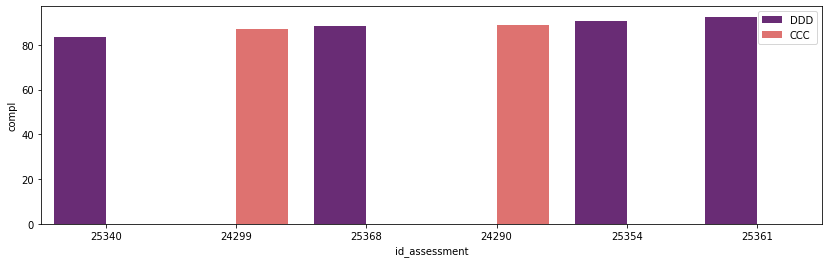

In [23]:
# Визуализация.

ordered = list(exam_att.id_assessment)
plt.figure(figsize=(14, 4))

sns.barplot(data=exam_att, x='id_assessment', y='compl', hue='code_module', order=ordered, palette='magma')
plt.legend(loc='upper right')

In [ ]:
###################################################################################################################

In [ ]:
# Задание 3
# По каждому предмету определи средний срок сдачи экзаменов 
# (под сдачей понимаем последнее успешное прохождение экзамена студентом).

In [ ]:
# Проверить, есть ли пересдачи одного и того же экзамена для одного и того же студента в таблице (если вдруг он хотел повысить балл).
# Для этого считаем количество уникальных сданных экзаменов студентом и его общее количество оценок, сравниваем.

In [93]:
# Считаем количество уникальных сданных экзаменов каждым студентом.

passed_exams = exam_data \
    .query('score >= 40')\
    .groupby('id_student', as_index=False)\
    .id_assessment \
    .nunique() \
    .rename(columns={'id_assessment': 'assessments'})
passed_exams.head()

,id_student,assessments
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


In [94]:
# Сколько оценок за экзамены получил каждый студент.

scores_count = exam_data \
    .query('score >= 40')\
    .groupby('id_student', as_index=False) \
    .score \
    .count() \
    .rename(columns={'score': 'scores'})
scores_count.head()

,id_student,scores
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


In [95]:
# Сравниваем две таблицы, если они не совпадают, значит при заданных условиях какой-то экзамен студентами/студентом сдавался несколько раз,
# и нужно будет по id_student брать именно последнюю дату сдачи конкретного экзамена.
# У нас все ок, можно двигаться дальше.

sum(passed_exams.assessments != scores_count.scores)

0

In [27]:
#  Считаем средний срок сдачи каждого экзамена и сохраняем в новую таблицу. Сортируем таблицу по значнию среднего срока сдачи экзамена.

exam_data3 = exam_data \
    .query('score >= 40') \
    .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index=False) \
    .agg({'date_submitted': 'mean'}) \
    .rename(columns={'date_submitted': 'mean_days'})
exam_data3.sort_values('mean_days')

,code_module,code_presentation,id_assessment,mean_days
2,DDD,2013B,25340,230.164683
0,CCC,2014B,24290,231.581325
4,DDD,2014B,25361,234.936082
3,DDD,2013J,25354,239.509112
5,DDD,2014J,25368,242.804038
1,CCC,2014J,24299,244.404318


Text(0, 0.5, 'mean days to submition')

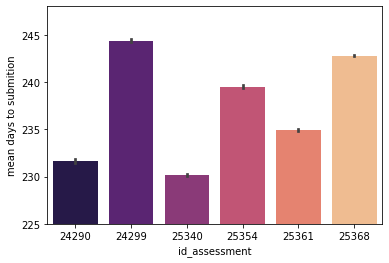

In [28]:
# Визуализация. Средний срок сдачи экзаменов.

sns.barplot(x="id_assessment", y="date_submitted", data=exam_data, palette='magma')
plt.ylim(225, 248)
plt.ylabel('mean days to submition')

In [29]:
# Считаем средний срок сдачи сдачи предметов.

exam_data3 \
    .groupby('code_module', as_index=False) \
    .mean_days.mean().round(2)

# Для предмета CCC средний срок сдачи составляет 237.99 дней,
# для предмета DDD средний срок сдачи составляет 236.85 дней.
# Средний срок сдачи курса DDD меньше, чем CCC.

,code_module,mean_days
0,CCC,237.99
1,DDD,236.85


In [ ]:
# Так как длина самого модуля сильно влияет на срок сдачи экзамена,
# попробуем посмотреть на длину самого модуля и нормализовать данные.

In [30]:
# Объединяем таблицы, чтобы получить данные о длине курса.

exam_data_len = exam_data.merge(courses, on=['code_module', 'code_presentation'])
exam_data_len.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,module_presentation_length
0,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,241
1,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,241
2,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,241
3,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,241
4,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,241


In [31]:
# В полученную ранее таблицу добавляем колонку с информацией о длине самого модуля.

exam_data3['module_length'] = exam_data_len \
    .groupby(['code_module', 'code_presentation', 'id_assessment'], as_index=False) \
    .agg({'module_presentation_length': 'mean'}) \
    .rename(columns={'module_presentation_length': 'module_length'}).module_length
exam_data3['norm'] = exam_data3.mean_days/exam_data3.module_length

In [32]:
# Сортируем таблицу по нормализованному на длину модуля значению среднего срока сдачи экзамена. 
# Результат изменился!

exam_data3.sort_values('norm')

,code_module,code_presentation,id_assessment,mean_days,module_length,norm
1,CCC,2014J,24299,244.404318,269,0.908566
3,DDD,2013J,25354,239.509112,261,0.917659
5,DDD,2014J,25368,242.804038,262,0.926733
2,DDD,2013B,25340,230.164683,240,0.959020
0,CCC,2014B,24290,231.581325,241,0.960918
4,DDD,2014B,25361,234.936082,241,0.974839


Text(0, 0.5, 'norm mean days to submition')

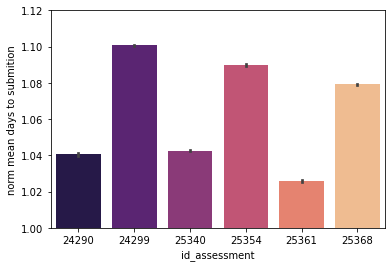

In [96]:
# Визуализация. Средний срок сдачи экзаменов(нормализованный на длину модуля).

exam_data_len['norm'] = exam_data_len.module_presentation_length/exam_data_len.date_submitted
sns.barplot(x='id_assessment', y='norm', data=exam_data_len, palette='magma')
plt.ylim(1, 1.12)
plt.ylabel('norm mean days to submition')

In [34]:
# Считаем нормализованный средний срок сдачи предметов.
# Результат изменился!
# Средний срок сдачи курса ССС меньше, чем DDD.

exam_data3 \
    .groupby('code_module', as_index=False) \
    .norm.mean()

,code_module,norm
0,CCC,0.934742
1,DDD,0.944563


In [ ]:
###################################################################################################################

In [ ]:
# Задание 4
# Выяви самые популярные курсы (ТОП-3) по количеству регистраций на них.
# А также курсы с самым большим оттоком (ТОП-3). (8 баллов)

In [35]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [36]:
studentRegistration.shape

(32593, 5)

In [37]:
studentRegistration.isna().sum()

# В колонке "date_unregistration" наличие NaN - справедливая ситуация (из описания данных), 
# но NaN встречаются и в колонке с информацией о дате регистрации студентов на курсы.

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

In [38]:
# Возможно, в ряде случаев нет информации о дате регистрации из-за ошибок записи данных в таблицу.
# Проверяем, есть ли дубликаты конкретного студента, курса и семестра.

studentRegistration[studentRegistration.duplicated(['id_student', 'code_module', 'code_presentation'])]

# Дубликатов нет (по заданным условиям).

,code_module,code_presentation,id_student,date_registration,date_unregistration


In [39]:
# Сохраняем отдельно данные о студентах, для которых не указана дата регистрации на курс.

without_datereg = studentRegistration.loc[studentRegistration.date_registration.isna()]
without_datereg.shape
without_datereg

,code_module,code_presentation,id_student,date_registration,date_unregistration
2344,BBB,2013B,630346,NaN,NaN
2538,BBB,2013J,57369,NaN,-1.0
2759,BBB,2013J,342678,NaN,-33.0
5356,BBB,2014B,582496,NaN,-126.0
5490,BBB,2014B,607646,NaN,-38.0
5573,BBB,2014B,614270,NaN,-142.0
6295,BBB,2014B,2409808,NaN,-109.0
6305,BBB,2014B,2439442,NaN,-149.0
8307,BBB,2014J,694001,NaN,-36.0
8975,CCC,2014B,394791,NaN,-61.0


In [40]:
# Проверяем, сдавали ли они какие-либо тесты в рамках каких-либо курсов.

without_datereg.loc[without_datereg.id_student.isin(assessments_merged.id_student)]

# Информация о прохождении курсов для части студентов есть в таблице с результатами тестов студентов (studentAssessment).

# следующий шаг - проверить их активность в течение семестра, на каком курсе они зарегестрированы (совпадает ли курс 
# из стаблицы с регистрациями с фактическим).

without_datereg_inasses = without_datereg.loc[without_datereg.id_student.isin(assessments_merged.id_student)]
without_datereg_inasses

,code_module,code_presentation,id_student,date_registration,date_unregistration
8975,CCC,2014B,394791,NaN,-61.0
9523,CCC,2014B,575419,NaN,-24.0
11249,CCC,2014J,544271,NaN,-29.0
13135,DDD,2013B,128965,NaN,-24.0
15214,DDD,2013J,550142,NaN,-196.0
16862,DDD,2014B,591648,NaN,-213.0
18249,DDD,2014J,604632,NaN,12.0
20413,EEE,2013J,2681277,NaN,-166.0
26576,FFF,2014B,535460,NaN,-365.0


In [97]:
# Объединяем таблицы:
# отфильтрованная таблица регистраций на курс со студентами без даты регистрации, но активных согласно таблице с тестами студентов
# таблица с результатами тестов 
# чтобы посмотреть, совпадают ли курс и семестр в таблице с регистрациями и активностями.

merge_without_datereg_inasses = pd.merge(without_datereg_inasses, assessments_merged, how='left', 
                                        left_on=['id_student','code_presentation', 'code_module'], 
                                        right_on =['id_student','code_presentation', 'code_module']) 
merge_without_datereg_inasses 

,code_module,code_presentation,id_student,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,score,assessment_type,date,weight,first_test
0,CCC,2014B,394791,NaN,-61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CCC,2014B,575419,NaN,-24.0,24286.0,20.0,0.0,0.0,CMA,18.0,2.0,2013J
2,CCC,2014J,544271,NaN,-29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DDD,2013B,128965,NaN,-24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,DDD,2013J,550142,NaN,-196.0,25348.0,-1.0,1.0,64.0,TMA,25.0,10.0,2013B
5,DDD,2013J,550142,NaN,-196.0,25349.0,-1.0,1.0,68.0,TMA,53.0,12.5,2013B
6,DDD,2013J,550142,NaN,-196.0,25350.0,-1.0,1.0,82.0,TMA,88.0,17.5,2013B
7,DDD,2013J,550142,NaN,-196.0,25351.0,-1.0,1.0,16.0,TMA,123.0,20.0,2013B
8,DDD,2014B,591648,NaN,-213.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,DDD,2014J,604632,NaN,12.0,25363.0,41.0,0.0,85.0,TMA,41.0,10.0,2014J


In [ ]:
# Таким образом, 

# часть студентов, для которых нет информации о дате регистрации на определенный курс определенного семестра, 
# сдавали тесты в рамках этого курса, хотя по информации из таблицы с регистрациями, они, собственно, 
# отменили регистрацию на этот курс в этом конкретном семестре;

# для другой группы студентов, также без информации о дате регистрации, также отменивших первоначальную регистрацию,
# есть информация о том, что они проходили курс,
# но в другом семестре, либо проходили другой курс, а не тот, который указан в таблице с регистрациями;


# большая часть студентов, для которых нет информации о дате регистрации, которые отменили регистрацию, курс и не проходили (что норм!).

# Разобраться, с чем связаны такие аномалии.

In [ ]:
# Собственно 4 задание.

In [49]:
# Почему нужно считать через уникальных студентов на курс? Т.к. на один и тот же курс один и тот же студент
# может регистрироваться несколько раз(на какой-то семестр/год, затем отменить регистрацию, снова зарегаться и т.д.).

# Данные с многократными регистрациями одиними и теми же студентами на один курс не дает нам информации о
# реальной заинтересованности какого-то процента обучающихся/потенциальных студентов в данном курсе.

In [42]:
# Подсчет уникальных зарегистрированных студентов на курс ЗА ВСЕ ВРЕМЯ. Сортировка и вывод ТОП-3 курса.

studentRegistration \
    .groupby('code_module', as_index=False) \
    .id_student \
    .nunique() \
    .rename(columns={'id_student': 'registrations'}) \
    .sort_values('registrations', ascending=False) \
    .head(3)

# ТОП-3: BBB, FFF, DDD.

,code_module,registrations
1,BBB,7692
5,FFF,7397
3,DDD,5848


In [43]:
# Визуализация результатов.

viz_alltime = studentRegistration \
    .groupby('code_module', as_index=False) \
    .id_student \
    .nunique() \
    .rename(columns={'id_student': 'registrations'})

<AxesSubplot:xlabel='code_module', ylabel='registrations'>

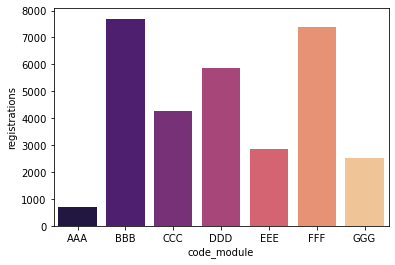

In [98]:
sns.barplot(x="code_module", y="registrations", data=viz_alltime, palette='magma')

In [45]:
# Стоит проверить, сохраняется ли эта тенденция в каждый конкретный год.
# Предобработка данных для разбивки по годам.

studentRegistration['year'] = studentRegistration.code_presentation.apply(lambda x: x[:-1])

In [100]:
# Регистрация на курс уникальных студентов С РАЗБИВКОЙ ПО ГОДАМ.

studentRegistration \
    .groupby(['code_module', 'year'], as_index=False) \
    .id_student \
    .nunique() \
    .rename(columns={'id_student': 'registrations'}) \
    .pivot(index='year', columns='code_module', values='registrations').reset_index()

# Оказывается, курс ССС впервые был запущен в 2014 году, и сразу же привлек к себе больше всего внимания.

code_module,year,AAA,BBB,CCC,DDD,EEE,FFF,GGG
0,2013,383.0,3960.0,NaN,3164.0,1052.0,3852.0,952.0
1,2014,365.0,3880.0,4251.0,2947.0,1859.0,3791.0,1579.0


In [47]:
#  Визуализация результатов.

viz_byyear = studentRegistration \
    .groupby(['code_module', 'year'], as_index=False) \
    .id_student \
    .nunique() \
    .rename(columns={'id_student': 'registrations'})


<AxesSubplot:xlabel='code_module', ylabel='registrations'>

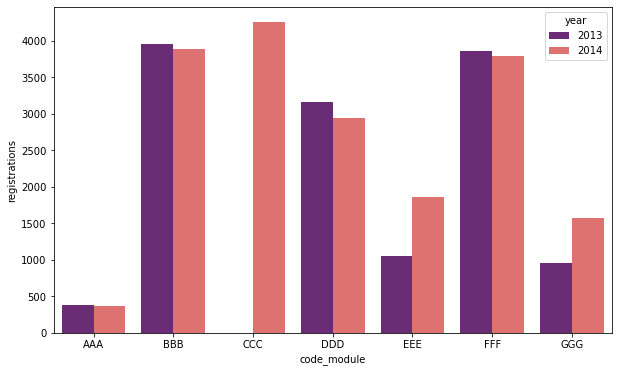

In [101]:
plt.figure(figsize=(10, 6))
sns.barplot(x='code_module', y='registrations', hue='year', data=viz_byyear, palette='magma')

In [ ]:
# Таким образом, ТОП-3 курса по регистрации на них: ССС, BBB, FFF.
# PS: видимо, курс ССС запустили в 2014 году или в 2013 на него не было набора.

In [ ]:
# Курсы с самым большим оттоком (ТОП-3).

In [49]:
# ТОП-3 курса с самым большим оттоком: BBB, FFF, DDD.

studentRegistration.loc[studentRegistration.date_unregistration.notna()] \
    .groupby('code_module', as_index=False) \
    .id_student \
    .nunique() \
    .rename(columns={'id_student': 'unregistrations'}) \
    .sort_values('unregistrations', ascending=False) \
    .head(3)

,code_module,unregistrations
1,BBB,2314
5,FFF,2249
3,DDD,2065


In [50]:
# Анализ повторных регистраций на курс.

studentRegistration_mult_reg = studentRegistration\
    .groupby(['id_student', 'code_module'], as_index=False) \
    .agg({'code_presentation': 'count'}) \
    .rename(columns={'code_presentation': 'number_ofRegistrations'}) \
    .query('number_ofRegistrations > 1')
studentRegistration_mult_reg.head()

,id_student,code_module,number_ofRegistrations
2,8462,DDD,2
9,24213,DDD,2
16,25629,BBB,2
29,27417,DDD,2
34,27891,BBB,2


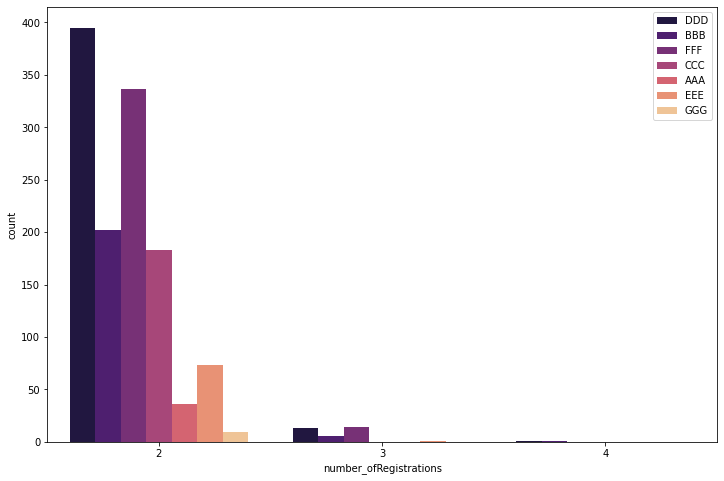

In [102]:
# Повторные регистрации по курсам (2 и более регистрации на один и тот же курс одним и тем же студентом (в разные года и разные семестры)).

plt.figure(figsize=(12, 8))
sns.countplot(x='number_ofRegistrations', hue='code_module', data=studentRegistration_mult_reg, palette='magma')
plt.legend(loc='upper right')

In [ ]:
###################################################################################################################

In [ ]:
# Задание 5

In [104]:
def cohort(student_assessments_path, assessments_path):
    # считываем данные
    student_assessments = pd.read_csv(student_assessments_path)
    assessments = pd.read_csv(assessments_path)
    
    # мержим таблицы по id_assessment
    assessments_merged = student_assessments.merge(assessments, on='id_assessment')
    
    # добавляем колонку с разбивкой студентов по когортам
    assessments_merged.set_index('id_student', inplace=True)
    assessments_merged['first_test'] = assessments_merged.groupby(level=0)['code_presentation'].min()
    assessments_merged.reset_index(inplace=True)

    # все попытки сдать экзамен
    all_attempts = assessments_merged \
        .query('assessment_type == "Exam"') \
        .groupby(['first_test', 'code_module', 'code_presentation'], as_index=False) \
        .agg({'id_student':'nunique'}) \
        .pivot(index=['first_test', 'code_module'], columns='code_presentation', values='id_student').sum()
    
    # успешные попытки сдать экзамен
    success_attempts = assessments_merged\
        .query('assessment_type == "Exam" and score>=40') \
        .groupby(['first_test', 'code_module', 'code_presentation'], as_index=False) \
        .agg({'id_student':'nunique'}) \
        .pivot(index=['first_test', 'code_module'], columns='code_presentation', values='id_student').sum()
    min_value = (success_attempts/all_attempts).sort_values().index[0]
        
    max_aver_passing = assessments_merged \
        .query('assessment_type== "Exam"') \
        .groupby(['first_test', 'code_module', 'code_presentation'], as_index=False) \
        .agg({'date_submitted':'mean'}) \
        .pivot(index=['first_test', 'code_module'], columns='code_presentation', values='date_submitted') \
        .mean().round() \
        .sort_values(ascending=False).index[0]
    
    return {'lowest_compl': min_value, 'max_aver_passing': max_aver_passing}

In [105]:
cohort(
    student_assessments_path='/home/alla/Downloads/cor/studentAssessment.csv',
    assessments_path='/home/alla/Downloads/cor/assessments.csv'
)

{'lowest_compl': '2013B', 'max_aver_passing': '2014J'}

In [ ]:
###################################################################################################################

In [ ]:
# Задание 6
# R - среднее время сдачи одного экзамена, F - завершаемость курсов, 
# M - среднее количество баллов, получаемое за экзамен.

In [62]:
# Используем отфильтрованную таблицу exam_data (из 2-ого задания) с данными о сдаче экзаменов студентами.

exam_data.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0


In [63]:
# Добавляем новую колоку compl, в которой значение 1 - студент сдал экзаменб 0 - студент не сдал экзамен.

exam_data['compl'] = exam_data.score.apply(lambda x: 1 if x >= 40 else 0)

/tmp/ipykernel_119956/1257130844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exam_data['compl'] = exam_data.score.apply(lambda x: 1 if x>=40 else 0)


In [64]:
# Группируем данные по Id студента, для каждого студента считаем среднее время сдачи экзаменов, средний балл, завершаемость курсов.

rfmData = exam_data\
    .groupby('id_student', as_index=False) \
    .agg({'score': 'mean', 'date_submitted': 'mean', 'compl': 'mean'}) \
    .rename(columns={'score': 'mean_score', 'date_submitted': 'mean_days'})


<AxesSubplot:ylabel='Frequency'>

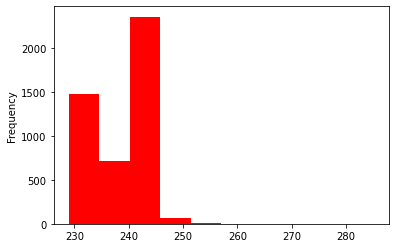

In [88]:
# Смотрим, как распределены рассчитанные метрики. 

rfmData.mean_days.plot.hist(color='red')

<AxesSubplot:ylabel='Frequency'>

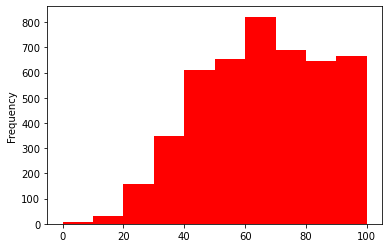

In [89]:
rfmData.mean_score.plot.hist(color='red')

<AxesSubplot:ylabel='Frequency'>

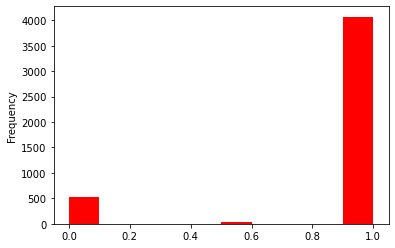

In [90]:
rfmData.compl.plot.hist(color='red')

In [ ]:
# Поскольку переменная compl (завершаемость) имеет 3 уровня, будем разбивать метрики на 3 диапазона.

# В случае завершаемости(F): 
#          завершаемость 1 = 3 (студент успешно сдал все экзамены), 
#          завершаемость 0.5 = 2 (студент успешно сдал часть экзаменов), 
#          завершаемость 0 = 1 (у студента нет положительной оценки ни по одному экзамену).

In [68]:
# Для среднего времени сдачи экзаменов(R) (распределение скошено влево) считаем среднее, медиану и моду (должны входить в сегмент 2).

rfmData.mean_days.mean()

238.46222749838117

In [69]:
rfmData.mean_days.median()

241.0

In [70]:
rfmData.mean_days.mode()

0    243.0
dtype: float64

In [71]:
rfmData.mean_days.quantile(q=[0.3333, 0.6666])

# При разбивке с помощью квантилей (33.33 и 66.66) медиана, среднее и мода входят в сегмент 2.

0.3333    236.0
0.6666    243.0
Name: mean_days, dtype: float64

In [ ]:
# В случае среднего времени сдачи экзаменов(R) и среднего балла(M) используем разбивку с помощью квантилей (33.33 и 66.66).

In [72]:
quantiles = rfmData.quantile(q=[0.3333, 0.6666])
quantiles = quantiles.to_dict()
segmented_rfm = rfmData

In [73]:
# Объявляем функцию для разбивки по сегментам метрики средней оценки за экзамены.

def RScore_score(x,p,d):
     if x <= d[p][0.3333]:
         return 1
     elif x <= d[p][0.6666]:
         return 2
     else:
         return 3

In [74]:
# Объявляем функцию для разбивки по сегментам метрики среднего времени сдачи экзамена.

def RScore_days(x,p,d):
     if x <= d[p][0.3333]:
         return 3
     elif x <= d[p][0.6666]:
         return 2
     else:
         return 1

In [75]:
# Объявляем функцию для разбивки по сегментам метрики завершаемости курсов.

def RScore_compl(x):
    if x==0:
        return 1
    elif x==0.5:
        return 2
    else:
        return 3

In [76]:
segmented_rfm['f'] = segmented_rfm['compl'].apply(RScore_compl)

In [77]:
segmented_rfm['r_quartile'] = segmented_rfm['mean_days'].apply(RScore_days, args=('mean_days',quantiles,))

In [78]:
segmented_rfm['m_quartile'] = segmented_rfm['mean_score'].apply(RScore_score, args=('mean_score',quantiles,))

In [80]:
# Создаем колонку с итоговым сегментом студента.

segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,id_student,mean_score,mean_days,compl,f,r_quartile,m_quartile,RFMScore
0,23698,80.0,243.0,1.0,3,2,3,233
1,24213,58.0,236.0,1.0,3,3,2,332
2,27116,96.0,243.0,1.0,3,2,3,233
3,28046,40.0,237.0,1.0,3,2,1,231
4,28787,44.0,243.0,1.0,3,2,1,231


In [81]:
# Получаем 16 кластеров студентов в зависимости от их показателей успеваемости.

segmented_rfm['RFMScore'].nunique()

16

<AxesSubplot:xlabel='RFMScore', ylabel='count'>

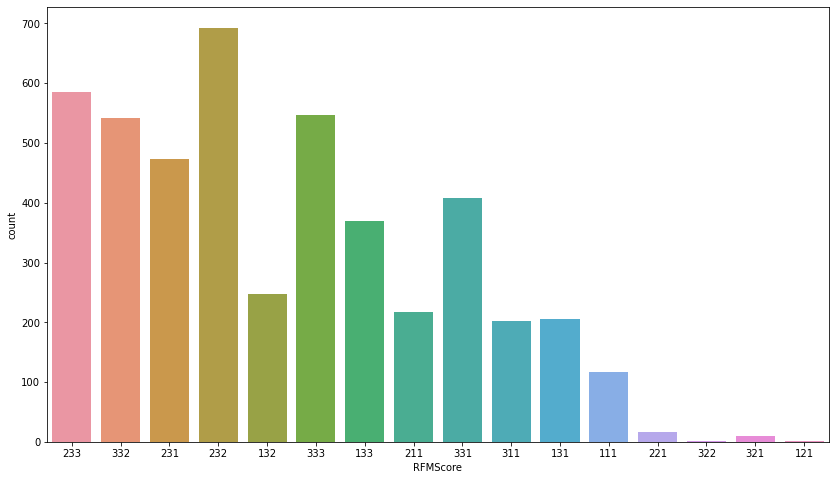

In [82]:
plt.figure(figsize=(14, 8))
sns.countplot(x='RFMScore', data=segmented_rfm)

In [ ]:
# Больше всего студентов относятся к класетру 232:
# среднее время сдачи экзамена: 236.5 - 243.0 дней
# завершаемость курсов: 1
# средний балл: 56.5-76.0

# Меньше всего студентов относятся к кластерам 322 и 121.
#
# 322:
# среднее время сдачи экзамена: 229.0 - 236.0 дней
# завершаемость курсов: 0.5 (есть неуспешные сдачи экзаменов)
# средний балл: 56.5-76.0
#
# 121 (студенты с неуспешными сдачами экзаменов):
# среднее время сдачи экзамена: 243.5 - 285.0 дней
# завершаемость курсов: 0.5 (есть неуспешные сдачи экзаменов)
# средний балл: 0.0 - 56.0


In [83]:
# Границы сегментов для метрики "завершаемость курсов" (f).

segmented_rfm \
    .groupby('f') \
    .agg({'compl':['min', 'max']})

compl     
    min  max
f           
1   0.0  0.0
2   0.5  0.5
3   1.0  1.0

In [84]:
# Границы сегментов для метрики "средний балл за экзамены" (m).

segmented_rfm \
    .groupby('m_quartile') \
    .agg({'mean_score':['min', 'max']})

mean_score       
                  min    max
m_quartile                  
1                 0.0   56.0
2                56.5   76.0
3                76.5  100.0

In [85]:
# Границы сегментов для метрики "среднее время сдачи экзамена" (r).

segmented_rfm \
    .groupby('r_quartile') \
    .agg({'mean_days':['min', 'max']})

mean_days       
                 min    max
r_quartile                 
1              243.5  285.0
2              236.5  243.0
3              229.0  236.0